In [3]:
# MNIST CNN with TensorBoard

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [9]:
image = X_train[101]
image.shape

(28, 28)

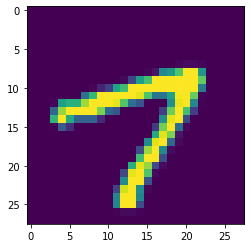

In [10]:
plt.imshow(image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# Need to classify -> convert to categorical

from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [15]:
# Scaling: Max  = 255

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
# Need to add extra dimension -> greyscale. If was color -> 3 

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [96]:
# Generate model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(2,2),
                input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size = (1,1)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ["accuracy"])

In [97]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 11664)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                373280    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 373,690
Trainable params: 373,690
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [81]:
# Tensorboard definition
from datetime import datetime
timestamp = datetime.now().strftime("%d/%m/%Y, %H:%M:%S")
# Define TBoard and directory

log_directory = 'logs/fit'
log_directory = log_directory+'/'+timestamp

board = TensorBoard(log_dir = log_directory,
                   histogram_freq = 1,
                   write_graph = True,
                   write_images = True,
                   update_freq = 'epoch',
                   profile_batch = 2,
                   embeddings_freq = 1)

In [83]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test), callbacks=[early_stop,board])

Epoch 1/50
   1/1875 [..............................] - ETA: 0s - loss: 2.2742 - accuracy: 0.2500WARNING:tensorflow:From /Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2286 - accuracy: 0.9337 - val_loss: 0.1059 - val_accuracy: 0.9677
Epoch 2/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0814 - accuracy: 0.9757 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 3/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 4/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0696 - val_accuracy: 0.9777


In [84]:
# Evaluate

metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.228581,0.933667,0.105929,0.9677
1,0.081411,0.975700,0.071412,0.9786
2,0.049911,0.984550,0.066919,0.9797
3,0.034579,0.989283,0.069618,0.9777


<AxesSubplot:>

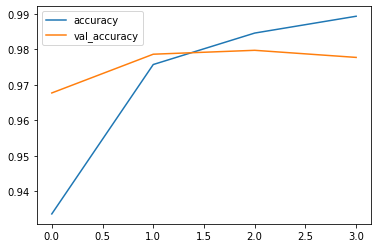

In [85]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

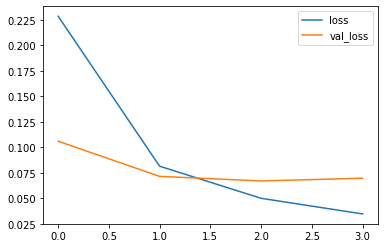

In [86]:
metrics[['loss', 'val_loss']].plot()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
preds = model.predict_classes(X_test)

In [89]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [90]:
confusion_matrix(y_test,preds)

array([[ 973,    0,    2,    0,    0,    1,    2,    1,    1,    0],
       [   1, 1128,    2,    1,    0,    0,    1,    1,    1,    0],
       [   7,    7,  999,    4,    2,    1,    1,    6,    4,    1],
       [   0,    1,    2,  996,    0,    4,    0,    2,    5,    0],
       [   1,    1,    0,    0,  965,    0,    6,    0,    1,    8],
       [   1,    0,    2,   10,    0,  870,    4,    1,    3,    1],
       [   6,    2,    2,    0,    3,    1,  942,    0,    2,    0],
       [   2,    5,   12,    3,    1,    0,    0,  998,    6,    1],
       [   3,    0,    3,    3,    1,    2,    4,    3,  955,    0],
       [   3,    6,    0,    5,   13,   10,    1,    8,   12,  951]])

In [91]:
# Single image

num = X_test[999]

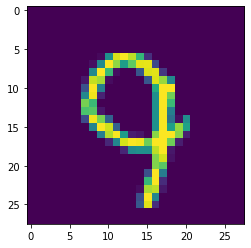

In [92]:
plt.imshow(num)

In [93]:
model.predict_classes(num.reshape(1,28,28,1))

array([9])

In [94]:
# looking at tensorboard -> https://localhost:6006/
# print(log_directory)
# pwd
# tensorboard --logdir logs/fit

In [95]:
print(log_directory)

logs/fit/20/11/2020, 09:18:06
